In [38]:
# preperation from https://www.tensorflow.org/tutorials/structured_data/time_series

In [10]:
! wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
! unzip jena_climate_2009_2016.csv.zip    

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  


In [74]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [131]:
df = pd.read_csv('jena_climate_2009_2016.csv')
df = df[5::6] #sample only hours
df['Date Time'] = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')

In [132]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,2016-12-31 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,2016-12-31 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,2016-12-31 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,2016-12-31 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


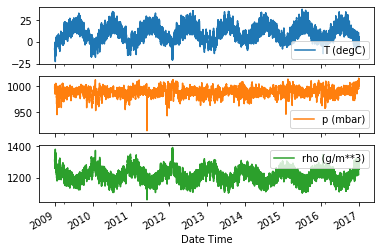

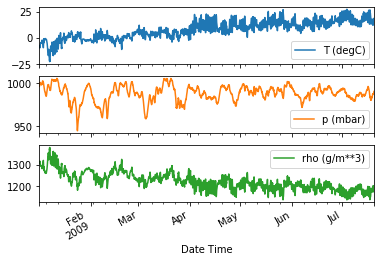

In [133]:
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = df['Date Time']
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:4800]
plot_features.index = df['Date Time'][:4800]
_ = plot_features.plot(subplots=True)


In [134]:
# fix wind
df.loc[df['wv (m/s)']==-9999.0,['wv (m/s)']] = 0.0
df.loc[df['max. wv (m/s)']==-9999.0,['max. wv (m/s)']] = 0.0

In [135]:
# convert wind velocity and degree to vector
df['Wx'] =  df['wv (m/s)']*np.cos(df['wd (deg)']*np.pi / 180)
df['Wy'] =  df['wv (m/s)']*np.sin(df['wd (deg)']*np.pi / 180)

df['max Wx'] = df['max. wv (m/s)']*np.cos(df['wd (deg)']*np.pi / 180)
df['max Wy'] = df['max. wv (m/s)']*np.sin(df['wd (deg)']*np.pi / 180)

In [136]:
# time
timestamp_s = df['Date Time'].map(datetime.datetime.timestamp)

In [137]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [141]:
#split train/val/test
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

In [142]:
train_mean = train_df.mean()
train_std = train_df.std()

In [140]:
train_df.loc[:,train_mean.index] = (train_df.loc[:,train_mean.index] - train_mean)/train_std
val_df.loc[:,train_mean.index] = (val_df.loc[:,train_mean.index] - train_mean)/train_std
test_df.loc[:,train_mean.index] = (test_df.loc[:,train_mean.index] - train_mean)/train_std

/Users/yonatang/.virtualenvs/ai/venv/lib/python3.6/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [146]:
train_df.to_csv('train.csv',index=False)
val_df.to_csv('val.csv',index=False)
test_df.to_csv('test.csv',index=False)